In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -l

total 8
-rw-r--r-- 1 root root   68 Apr  1 08:07 kaggle.json
drwxr-xr-x 1 root root 4096 Mar 28 13:39 sample_data


In [ ]:
# daatset api
!kaggle competitions download -c cifar-10

In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 33.4 MB/s eta 0:00:00


In [ ]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')
type(filenames)
len(filenames)
print(filenames [0:5])
print(filenames[-5:])

['45166.png', '47746.png', '36897.png', '5452.png', '19065.png']
['16557.png', '9026.png', '20521.png', '14886.png', '35895.png']


Labels Processing

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_df['label']

,label
0,frog
1,truck
2,truck
3,deer
4,automobile
...,...
49995,bird
49996,frog
49997,truck
49998,automobile


In [ ]:
labels_dictionary = {'airplane': 0, 'automobile':1, 'bird': 2, 'cat':3, 'deer':4, 'dog': 5, 'frog':6, 'horse':7,'ship':8, 'truck':9}
labels =[labels_dictionary[i] for i in labels_df['label']]
print(labels [0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


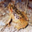

In [ ]:
# displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

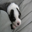

In [ ]:
# displaying sample image []
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

In [ ]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [ ]:
id_list = list(labels_df['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
# convert images to numpy arrays
train_data_folder = '/content/train/'
data = []
for id in id_list:
  image=Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
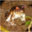

In [ ]:
data[0]

In [ ]:
# convert image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

Train Test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled=X_test/255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
num_of_classes = 10
#setting up the layers of neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.2508 - loss: 2.0623 - val_acc: 0.3395 - val_loss: 1.8189
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3407 - loss: 1.8282 - val_acc: 0.3677 - val_loss: 1.7585
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3591 - loss: 1.7816 - val_acc: 0.3638 - val_loss: 1.7594
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3727 - loss: 1.7430 - val_acc: 0.3632 - val_loss: 1.7714
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3822 - loss: 1.7300 - val_acc: 0.3762 - val_loss: 1.7213
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3910 - loss: 1.7128 - val_acc: 0.3787 - val_loss: 1.7303
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.3939 - loss: 1.6934 - val_acc: 0.4042 - val_loss: 1.6678
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.3996 - loss: 1.6813 - val_acc: 0.4000 - val_loss: 1.6717
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras import Sequential, models,layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
num_0f_classes = 10
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_0f_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 438s 345ms/step - acc: 0.3189 - loss: 2.0540 - val_acc: 0.7555 - val_loss: 0.9257
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 396s 352ms/step - acc: 0.6645 - loss: 1.0978 - val_acc: 0.8903 - val_loss: 0.5036
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 443s 353ms/step - acc: 0.7939 - loss: 0.7813 - val_acc: 0.9115 - val_loss: 0.3632
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 353ms/step - acc: 0.8560 - loss: 0.6009 - val_acc: 0.9230 - val_loss: 0.2935
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 352ms/step - acc: 0.8979 - loss: 0.4662 - val_acc: 0.9358 - val_loss: 0.2528
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 352ms/step - acc: 0.9288 - loss: 0.3692 - val_acc: 0.9362 - val_loss: 0.2450
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 352ms/step - acc: 0.9472 - loss: 0.2973 - val_acc: 0.9373 - val_loss: 0.2269
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 352ms/step - acc: 0.9623 - loss: 0.2376 - val_acc: 0.9400 - val_loss: 0.2267
Epoch 9/

In [ ]:
import numpy as np
import pandas as pd
# Before making predictions:
# Assuming labels_dictionary is defined earlier in your code
labels_dictionary_reverse = {v: k for k, v in labels_dictionary.items()}
predict_x = model.predict(X_test_scaled)
classes_x = np.argmax(predict_x, axis=1)
# Convert predicted numerical labels to original class names
pred = [labels_dictionary_reverse[i] for i in classes_x[:20]]
# Extract actual labels from Y_test and convert to class names
act = [labels_dictionary_reverse[i] for i in Y_test[:20]]
res = pd.DataFrame([pred, act]).T
res.columns = ['predicted', 'actual']
res

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step


,predicted,actual
0,bird,bird
1,automobile,automobile
2,deer,deer
3,bird,bird
4,dog,dog
5,frog,frog
6,deer,deer
7,cat,cat
8,ship,ship
9,bird,bird


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - acc: 0.9302 - loss: 0.2429
Test Accuracy = 93.36000084877014


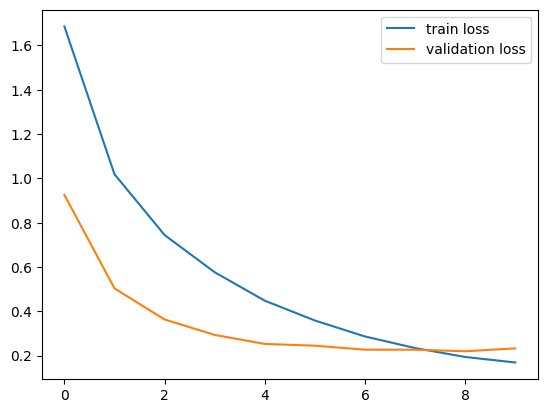

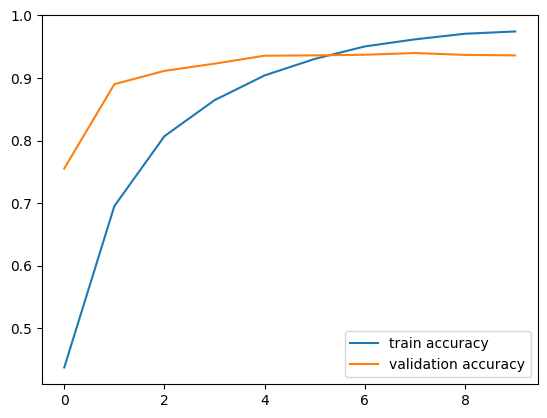

In [ ]:
h = history
# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 116s 93ms/step


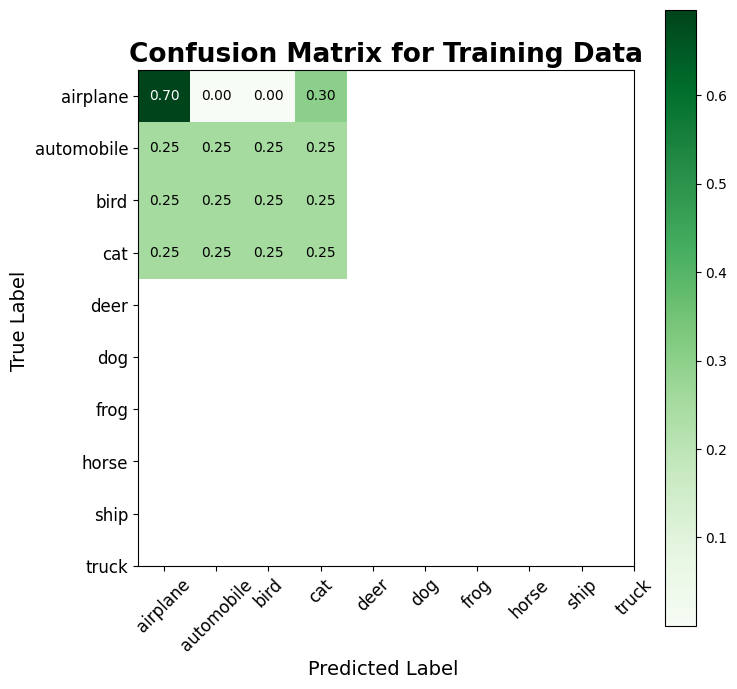

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step


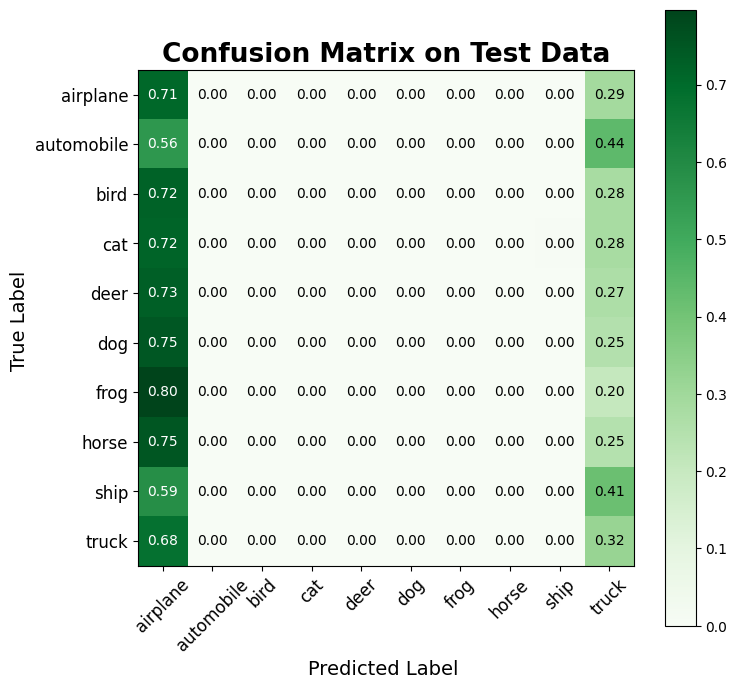

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Initialize and fit LabelEncoder
encode_X = LabelEncoder()
encode_X.fit(Y_train)  # Fit on training labels
def plot_cm(cm, text):
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  cm = cm + 1e-10
  plot_confusion_matrix(conf_mat = cm,
                        colorbar=True, figsize=(8, 8), cmap = 'Greens',
                        show_absolute = False, show_normed = True)
  tick_marks =  np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45, fontsize = 12)
  plt.yticks(tick_marks, class_names,fontsize = 12)
  plt.xlabel('Predicted Label ', fontsize = 14)
  plt.ylabel('True Label ', fontsize = 14)
  plt.title(text, fontsize = 19, weight = 'bold')
  plt.show()

train_cm = confusion_matrix(y_target = encode_X.inverse_transform([np.argmax(x) for x in Y_train]),
                            y_predicted = encode_X.inverse_transform(np.argmax(model.predict(X_train),axis=1)),
                            binary = False)
plot_cm(train_cm, 'Confusion Matrix for Training Data')
test_cm = confusion_matrix(y_target = Y_test,
                           y_predicted = encode_X.inverse_transform(np.argmax(model.predict(X_test),axis=1)),
                           binary = False)
plot_cm(test_cm, 'Confusion Matrix on Test Data')